In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/regression-kernel/column_2C_weka.csv


In [2]:
data = pd.read_csv("../input/regression-kernel/column_2C_weka.csv")

In [3]:
data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [4]:
data.loc[:,'class'] = [1 if each == "Abnormal" else 0 for each in data.loc[:,'class']]
y = data.loc[:,'class']
x_data = data.drop(["class"],axis=1)

In [5]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [6]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [7]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(25,knn.score(x_test,y_test)))

 25 nn score: 0.8064516129032258 


In [8]:
# find k value
score_list = []
for each in range(1,150):
 knn2 = KNeighborsClassifier(n_neighbors = each)
 knn2.fit(x_train,y_train)
 score_list.append(knn2.score(x_test,y_test))

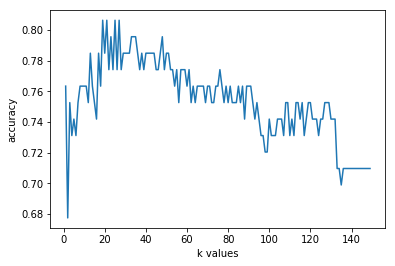

In [9]:
plt.plot(range(1,150),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [10]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# %% test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.6881720430107527


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
# %% Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
# %% test
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8172043010752689


In [12]:
#%%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("score: ", dt.score(x_test,y_test))

score:  0.7741935483870968


In [13]:
#%% random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.8709677419354839


random forest algo result:  0.8709677419354839


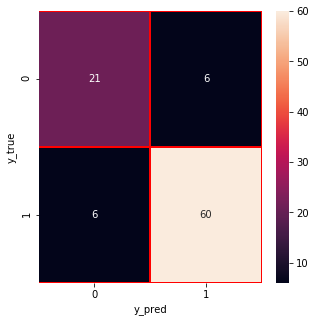

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))
y_pred = rf.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

%confusion matrix = (21+60)/93 = 0.8709677419354839
%Best Method is random forest (accuracy = 0.87)

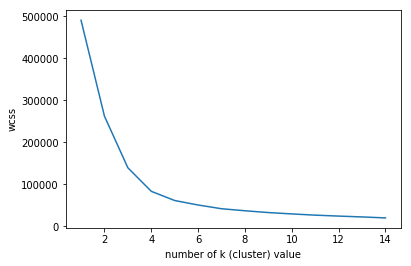

In [15]:
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(data2)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

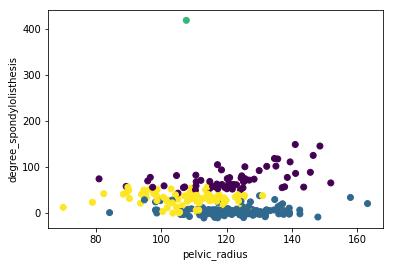

In [16]:
kmeans2 = KMeans(n_clusters=4)
clusters = kmeans2.fit_predict(data)
labels = clusters
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels) #c=color
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

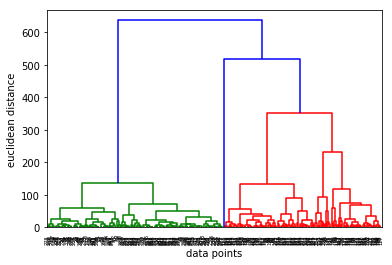

In [17]:
# %% dendogram
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data2,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

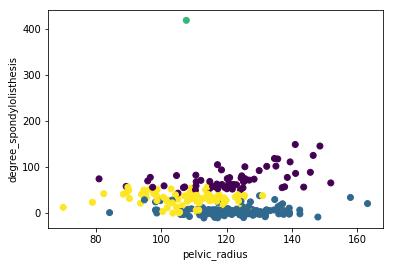

In [18]:
# %% HC
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(data)
labels2 = cluster
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels) #c=color
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()